In [82]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
tfd = tfp.distributions
%matplotlib inline

In [55]:
x.shape

TensorShape([100])

In [71]:
x = tf.linspace(-5, 5, 20)
x =tf.cast(x, dtype='float32')
y = 4*x + 5 + 2*tf.random.normal(shape=x.shape)



In [72]:
a = tf.constant([[2, 3], [3, 2]])
b = tf.constant([[1], [2]])
tf.concat([b, a], axis=1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [2, 3, 2]], dtype=int32)>

In [73]:
x.numpy().reshape(-1, 1).shape

(20, 1)

In [74]:
tf.ones(100, 1)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [76]:
x_with_1 = tf.concat([tf.ones((len(x), 1)), x.numpy().reshape(-1, 1)], axis=1)

In [77]:
x_with_1.shape

TensorShape([20, 2])

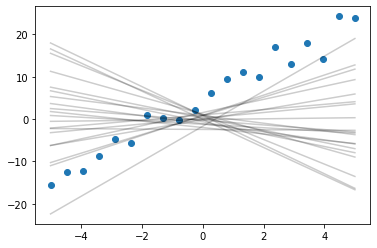

In [78]:
prior = tfp.distributions.MultivariateNormalDiag(loc=[0., 0.], scale_diag=[1., 2.])
s = prior.sample(20)
plt.scatter(x, y)
y_sample = x_with_1@s.T
plt.plot(x, y_sample, color='k', alpha=0.2);

In [83]:
g = tfp.layers.DistributionLambda(lambda t: tfd.MultivariateNormalDiag(loc=t))
    

In [94]:
s_good = tf.constant([4., 4.])
s_bad = tf.constant([0., 1.])

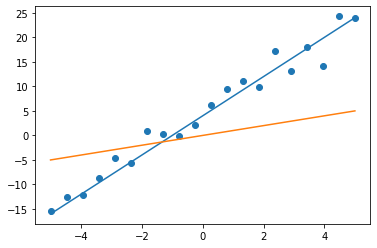

In [99]:
plt.plot(x, g(x_with_1@s_good).loc)
plt.scatter(x, y)

plt.plot(x, g(x_with_1@s_bad).loc)




In [93]:
g(x_with_1@s_good).log_prob(y)

<tf.Tensor: shape=(), dtype=float32, numpy=-70.05581>

In [95]:
g(x_with_1@s_bad).log_prob(y)

<tf.Tensor: shape=(), dtype=float32, numpy=-998.3014>

In [ ]:
@tfd.JointDistributionCoroutineAutoBatched
def auto_joint_dist():
    team_ability_scale = yield tfd.HalfNormal(scale=1.0)
    unit_attack = yield tfd.Normal(loc=tf.zeros(num_teams), scale=1.0)
    unit_defence = yield tfd.Normal(loc=tf.zeros(num_teams), scale=1.0)
    intercept = yield tfd.Normal(loc=0.0, scale=1.0)
    home_advantage = yield tfd.Normal(loc=0.0, scale=1.0)

    attack = team_ability_scale * unit_attack
    defence = team_ability_scale * unit_defence

    home_log_rate = (
        intercept
        + home_advantage
        + tf.gather(attack, home_team, axis=-1)
        - tf.gather(defence, away_team, axis=-1)
    )

    away_log_rate = (
        intercept
        - home_advantage
        + tf.gather(attack, away_team, axis=-1)
        - tf.gather(defence, home_team, axis=-1)
    )

    yield tfd.Poisson(log_rate=home_log_rate)
    yield tfd.Poisson(log_rate=away_log_rate)